# **Pretrain a TF model to imitate federated learning**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-01-14 11:55:24.788893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 11:55:25.331885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
RESULTS_ROOT = "../01_simulation/04_results/"
SEEDS = ['42', '1234', '1867', '613', '1001']

In [4]:
p_data = pd.DataFrame()
#READING DATA:
for s in SEEDS:
    filename = RESULTS_ROOT+f'poccup_by_vehs_{s}.csv'
    pf = pd.read_csv(filename)
    pf["seed"] = [s]*len(pf)
    p_data = pd.concat([p_data, pf])
    
p_data = pd.get_dummies(p_data, columns=["parking_id"])
p_data["time"] = p_data["time"] - 4*24*60*60
p_data["time"] = p_data["time"].astype(int)
p_data["time_of_day"] = (p_data["time"] - (p_data["time"] // (24*60*60))*24*60*60) / (24*60*60) #converting to 0.0-1.0 and removing periodicity

## Create vehicle list

In [6]:
vehicles = np.random.choice(p_data["veh_id"].unique(), 800)

In [7]:
# save the list of selected vehicles:
import json

save_vehs = {
    "sel_vehs": list(vehicles)
}
with open("veh_list.json", "w") as f:
    json.dump(save_vehs, f)

## Load vehicle list

In [5]:
#loading the list selected vehicles:
import json

with open("veh_list.json", "r") as f:
    saved_vehs = json.load(f)
vehicles = saved_vehs["sel_vehs"]

## Training

In [6]:
p_train = p_data[p_data["veh_id"].isin(vehicles)]

In [7]:
#p_train = p_train[p_train["time"] < 3*24*60*60]

In [8]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(0.001))
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)]

2024-01-14 11:55:39.298100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 11:55:39.335820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 11:55:39.335991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
X_train = p_train.drop(columns=["veh_id", "time", "occupancy", "seed"])
y_train = p_train["occupancy"]

In [10]:
history = model.fit(x=X_train, y=y_train, epochs=10000, batch_size=10000, callbacks=callbacks)

Epoch 1/10000


2024-01-14 11:55:52.467542: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-01-14 11:55:52.484163: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcf70d153d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-14 11:55:52.484182: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-01-14 11:55:52.487198: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-14 11:55:52.504864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-01-14 11:55:52.543464: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-14 11:

138/138 [==============================] - 2s 4ms/step - loss: 0.0734
Epoch 2/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0262
Epoch 3/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0092
Epoch 4/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 5/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 6/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 7/10000
138/138 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 8/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 9/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 10/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 11/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 12/10000
138/138 [==============================] - 1s 4ms/step - loss: 0.0024
Epo

## **Checking**

In [11]:
p_data

,veh_id,time,occupancy,seed,parking_id_pa-109,parking_id_pa-11,parking_id_pa-120,parking_id_pa-123,parking_id_pa-131,parking_id_pa-144,...,parking_id_pa55,parking_id_pa58,parking_id_pa60,parking_id_pa64,parking_id_pa68,parking_id_pa71,parking_id_pa75,parking_id_pa79,parking_id_pa92,time_of_day
0,h3098c1:0,10,0.923077,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000116
1,h3098c1:0,10,0.842105,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000116
2,h3098c1:0,10,0.769231,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000116
3,h3098c1:0,11,0.923077,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000127
4,h3098c1:0,11,0.842105,42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128768,h798c1:0,432000,0.000000,1001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3128769,h798c1:0,432000,0.750000,1001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3128770,h3101c1:0,432000,0.428571,1001,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3128771,h3101c1:0,432000,0.000000,1001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [12]:
#PARKING = "pa184"
PARKING = "pa-71"

In [13]:
parking_data = p_data[p_data[f"parking_id_{PARKING}"] == 1]
vis_data = parking_data.groupby("time_of_day")["occupancy"].mean()

In [14]:
t = np.arange(0, 1, 1/(24*60*60))

In [15]:
one_hot = parking_data.drop(columns=["veh_id", "time", "occupancy", "seed", "time_of_day"]).iloc[0]
one_hot = [one_hot.values]*len(t)

In [16]:
pred_x = np.array(one_hot)

In [17]:
pred_x = pd.DataFrame(pred_x)
pred_x["t"] = t

In [18]:
preds = model.predict(pred_x, batch_size=200)

432/432 [==============================] - 0s 807us/step


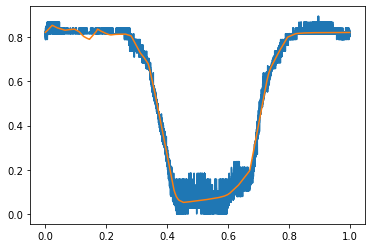

In [19]:
plt.plot(vis_data)
plt.plot(t, preds)

In [20]:
model.save("saved_models/pretrained")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(79, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6b910>, 140537705025328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(79, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6b910>, 140537705025328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf2a700>, 140537958275184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf2a700>, 140537958275184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf3d670>, 140537705255360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf3d670>, 140537705255360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf240a0>, 140537705256000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf240a0>, 140537705256000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787cfac0>, 140537705258640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787cfac0>, 140537705258640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6bfa0>, 140537704751472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6bfa0>, 140537704751472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17878ff40>, 140537705253984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17878ff40>, 140537705253984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787a1f10>, 140537705254704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787a1f10>, 140537705254704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(79, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6b910>, 140537705025328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(79, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6b910>, 140537705025328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf2a700>, 140537958275184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf2a700>, 140537958275184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf3d670>, 140537705255360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf3d670>, 140537705255360), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf240a0>, 140537705256000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf240a0>, 140537705256000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787cfac0>, 140537705258640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787cfac0>, 140537705258640), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6bfa0>, 140537704751472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17bf6bfa0>, 140537704751472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17878ff40>, 140537705253984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd17878ff40>, 140537705253984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787a1f10>, 140537705254704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd1787a1f10>, 140537705254704), {}).


INFO:tensorflow:Assets written to: saved_models/pretrained/assets


INFO:tensorflow:Assets written to: saved_models/pretrained/assets
